## 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/data/gapminder.tsv', sep='\t')

## 데이터 살펴보기

In [2]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [4]:
df.shape

(1704, 6)

In [5]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [6]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [7]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 열 단위로 데이터 추출하기

In [8]:
# 열 하나
country_df = df['country']
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [9]:
# 열 여러개는 리스트로 묶어줘야한다.
subset = df[['country', 'continent', 'year']]
subset .head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


## loc, iloc로 행 단위 데이터 추출하기

In [10]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [11]:
# loc 속성으로 행 데이터 추출하기 (index)
# df.loc[index, column]

# 1957을 가져오고 싶다면?
df.loc[1,'year']

1957

In [12]:
# iloc 속성으로 행 데이터 추출하기 (행 번호 )
# df.iloc[row num, column num]

# 1957을 가져오고 싶다면?
df.iloc[1,2]

1957

In [13]:
# 인덱스가 다르다면?
set_index = df.set_index('country')
set_index.head()

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
Afghanistan,Asia,1952,28.801,8425333,779.445314
Afghanistan,Asia,1957,30.332,9240934,820.853030
Afghanistan,Asia,1962,31.997,10267083,853.100710
Afghanistan,Asia,1967,34.020,11537966,836.197138
Afghanistan,Asia,1972,36.088,13079460,739.981106


In [14]:
set_index.loc['Afghanistan','year'][1]

1957

In [15]:
set_index.tail()

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
Zimbabwe,Africa,1987,62.351,9216418,706.157306
Zimbabwe,Africa,1992,60.377,10704340,693.420786
Zimbabwe,Africa,1997,46.809,11404948,792.449960
Zimbabwe,Africa,2002,39.989,11926563,672.038623
Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [16]:
# 음수도 가능
set_index.iloc[-1, -1]

469.7092981

In [17]:
# 여러개 가져오기
set_index.loc[:,['year','pop']]

,year,pop
country,,
Afghanistan,1952,8425333
Afghanistan,1957,9240934
Afghanistan,1962,10267083
Afghanistan,1967,11537966
Afghanistan,1972,13079460
...,...,...
Zimbabwe,1987,9216418
Zimbabwe,1992,10704340
Zimbabwe,1997,11404948


In [18]:
set_index.iloc[:,[1,3]]

,year,pop
country,,
Afghanistan,1952,8425333
Afghanistan,1957,9240934
Afghanistan,1962,10267083
Afghanistan,1967,11537966
Afghanistan,1972,13079460
...,...,...
Zimbabwe,1987,9216418
Zimbabwe,1992,10704340
Zimbabwe,1997,11404948


## Groupby
* 매우 중요
* 시각화에 필수

In [19]:
df.groupby('country')['lifeExp'].mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [20]:
df.groupby('country')[['lifeExp']].mean()

,lifeExp
country,
Afghanistan,37.478833
Albania,68.432917
Algeria,59.030167
Angola,37.883500
Argentina,69.060417
...,...
Vietnam,57.479500
West Bank and Gaza,60.328667
"Yemen, Rep.",46.780417


In [21]:
df.groupby('country')[['lifeExp','year']].mean()

,lifeExp,year
country,,
Afghanistan,37.478833,1979.5
Albania,68.432917,1979.5
Algeria,59.030167,1979.5
Angola,37.883500,1979.5
Argentina,69.060417,1979.5
...,...,...
Vietnam,57.479500,1979.5
West Bank and Gaza,60.328667,1979.5
"Yemen, Rep.",46.780417,1979.5


In [22]:
# as_index=False 하면 그룹화 한 데이터 들이 인덱스에서 컬럼으로 변경된다.
df.groupby('country', as_index=False)[['lifeExp','year']].mean()

,country,lifeExp,year
0,Afghanistan,37.478833,1979.5
1,Albania,68.432917,1979.5
2,Algeria,59.030167,1979.5
3,Angola,37.883500,1979.5
4,Argentina,69.060417,1979.5
...,...,...,...
137,Vietnam,57.479500,1979.5
138,West Bank and Gaza,60.328667,1979.5
139,"Yemen, Rep.",46.780417,1979.5
140,Zambia,45.996333,1979.5


In [23]:
# 대륙별 기대수명의 평균을 그룹바이로 표현
# contient는 인덱스가 아닌 컬럼으로

lifeExp_mean = df.groupby('continent', as_index=False)[['lifeExp']].mean()
lifeExp_mean

,continent,lifeExp
0,Africa,48.865330
1,Americas,64.658737
2,Asia,60.064903
3,Europe,71.903686
4,Oceania,74.326208


In [24]:
# 컬럼명 바꾸기
lifeExp_mean = lifeExp_mean.rename(columns = {'lifeExp':'mean_lifeExp'})
lifeExp_mean

,continent,mean_lifeExp
0,Africa,48.865330
1,Americas,64.658737
2,Asia,60.064903
3,Europe,71.903686
4,Oceania,74.326208


In [25]:
# 그룹바이와 컬럼명 변경 한번에 하기
# df.groupby('그룹바이 기준 컬럼', as_index=False).agg(새컬럼명=('계산할 컬럼','계산방법'))
df.groupby('continent', as_index=False).agg(mean_lifeExp=('lifeExp','mean'))

,continent,mean_lifeExp
0,Africa,48.865330
1,Americas,64.658737
2,Asia,60.064903
3,Europe,71.903686
4,Oceania,74.326208


In [26]:
# 대륙 별 country 개수
df.groupby('continent', as_index=False).agg(count_country=('country','count'))

,continent,count_country
0,Africa,624
1,Americas,300
2,Asia,396
3,Europe,360
4,Oceania,24


In [27]:
# 여러개의 컬럼을 groupby
df.groupby(['continent','year'])[['lifeExp']].mean()

lifeExp
continent year           
Africa    1952  39.135500
          1957  41.266346
          1962  43.319442
          1967  45.334538
          1972  47.450942
          1977  49.580423
          1982  51.592865
          1987  53.344788
          1992  53.629577
          1997  53.598269
          2002  53.325231
          2007  54.806038
Americas  1952  53.279840
          1957  55.960280
          1962  58.398760
          1967  60.410920
          1972  62.394920
          1977  64.391560
          1982  66.228840
          1987  68.090720
          1992  69.568360
          1997  71.150480
          2002  72.422040
          2007  73.608120
Asia      1952  46.314394
          1957  49.318544
          1962  51.563223
          1967  54.663640
          1972  57.319269
          1977  59.610556
          1982  62.617939
          1987  64.851182
          1992  66.537212
          1997  68.020515
          2002  69.233879
          2007  70.728485
Europe    1952  64.408500
          1957  66.703067
          1962  68.539233
          1967  69.737600
          1972  70.775033
          1977  71.937767
          1982  72.806400
          1987  73.642167
          1992  74.440100
          1997  75.505167
          2002  76.700600
          2007  77.648600
Oceania   1952  69.255000
          1957  70.295000
          1962  71.085000
          1967  71.310000
          1972  71.910000
          1977  72.855000
          1982  74.290000
          1987  75.320000
          1992  76.945000
          1997  78.190000
          2002  79.740000
          2007  80.719500

In [28]:
df.groupby(['continent','year']).agg(continent_year = ('lifeExp','mean'))

continent_year
continent year                
Africa    1952       39.135500
          1957       41.266346
          1962       43.319442
          1967       45.334538
          1972       47.450942
          1977       49.580423
          1982       51.592865
          1987       53.344788
          1992       53.629577
          1997       53.598269
          2002       53.325231
          2007       54.806038
Americas  1952       53.279840
          1957       55.960280
          1962       58.398760
          1967       60.410920
          1972       62.394920
          1977       64.391560
          1982       66.228840
          1987       68.090720
          1992       69.568360
          1997       71.150480
          2002       72.422040
          2007       73.608120
Asia      1952       46.314394
          1957       49.318544
          1962       51.563223
          1967       54.663640
          1972       57.319269
          1977       59.610556
          1982       62.617939
          1987       64.851182
          1992       66.537212
          1997       68.020515
          2002       69.233879
          2007       70.728485
Europe    1952       64.408500
          1957       66.703067
          1962       68.539233
          1967       69.737600
          1972       70.775033
          1977       71.937767
          1982       72.806400
          1987       73.642167
          1992       74.440100
          1997       75.505167
          2002       76.700600
          2007       77.648600
Oceania   1952       69.255000
          1957       70.295000
          1962       71.085000
          1967       71.310000
          1972       71.910000
          1977       72.855000
          1982       74.290000
          1987       75.320000
          1992       76.945000
          1997       78.190000
          2002       79.740000
          2007       80.719500

## pivot table
* index, column, values 가 구분 될 때 사용하면 좋다.
* column은 생략 가능

In [29]:
data=pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/data/@preprocessing_data_member01.csv')
data.head()

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.0,0.0,0.0,1.0,0.0,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.0,0.0,0.0,1.0,0.0,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.0,0.0,0.0,0.0,1.0,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.0,0.0,0.0,1.0,0.0,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.0,0.0,0.0,0.0,0.0,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday


In [30]:
pd.pivot_table(data=data, index='최종주문요일', values='총구매횟수', aggfunc='mean')

,총구매횟수
최종주문요일,
Friday,4.135870
Monday,3.842661
Saturday,2.895735
Sunday,3.699588
Thursday,4.484615
Tuesday,4.107296
Wednesday,4.506878


In [31]:
pd.pivot_table(data=data, index='최종주문요일', values='총구매횟수', aggfunc='mean').T

최종주문요일,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
총구매횟수,4.13587,3.842661,2.895735,3.699588,4.484615,4.107296,4.506878


In [32]:
pd.pivot_table(data=data, index='최종주문요일', columns='성별', values='총구매횟수')

성별,남자,여자
최종주문요일,,
Friday,3.286982,13.700000
Monday,3.375431,9.197368
Saturday,2.675127,6.000000
Sunday,3.103604,10.000000
Thursday,3.750588,14.883333
Tuesday,3.628339,9.915493
Wednesday,3.776897,14.903226


In [33]:
# groupby로 만들기
data.groupby(['최종주문요일','성별'])[['총구매횟수']].mean()

총구매횟수
최종주문요일    성별           
Friday    남자   3.286982
          여자  13.700000
Monday    남자   3.375431
          여자   9.197368
Saturday  남자   2.675127
          여자   6.000000
Sunday    남자   3.103604
          여자  10.000000
Thursday  남자   3.750588
          여자  14.883333
Tuesday   남자   3.628339
          여자   9.915493
Wednesday 남자   3.776897
          여자  14.903226

In [34]:
# 

## 불린추출
* 매우 중요

In [35]:
df['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [36]:
# 2000년대 이전 데이터만 추출하기
df['year']<2000
# 불린 값

0        True
1        True
2        True
3        True
4        True
        ...  
1699     True
1700     True
1701     True
1702    False
1703    False
Name: year, Length: 1704, dtype: bool

In [37]:
# True만 가져온다.
df[df['year']<2000]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1697,Zimbabwe,Africa,1977,57.674,6642107,685.587682
1698,Zimbabwe,Africa,1982,60.363,7636524,788.855041
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786


In [38]:
# 2000년대 이하면서 기대수명이 평균보다 큰 국가만
# 괄호로 조건 하나씩 구분
df[(df['year']<2000) & (df['lifeExp']>df['lifeExp'].mean())]

,country,continent,year,lifeExp,pop,gdpPercap
14,Albania,Europe,1962,64.820,1728137,2312.888958
15,Albania,Europe,1967,66.220,1984060,2760.196931
16,Albania,Europe,1972,67.690,2263554,3313.422188
17,Albania,Europe,1977,68.930,2509048,3533.003910
18,Albania,Europe,1982,70.420,2780097,3630.880722
...,...,...,...,...,...,...
1664,West Bank and Gaza,Asia,1992,69.718,2104779,6017.654756
1665,West Bank and Gaza,Asia,1997,71.096,2826046,7110.667619
1698,Zimbabwe,Africa,1982,60.363,7636524,788.855041
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306


In [39]:
# 특정 국가만
df[df['country']=='Afghanistan']

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [40]:
# 그 반대 -> ~ 사용
df[~df['country'].isin(['Afghanistan'])]

,country,continent,year,lifeExp,pop,gdpPercap
12,Albania,Europe,1952,55.230,1282697,1601.056136
13,Albania,Europe,1957,59.280,1476505,1942.284244
14,Albania,Europe,1962,64.820,1728137,2312.888958
15,Albania,Europe,1967,66.220,1984060,2760.196931
16,Albania,Europe,1972,67.690,2263554,3313.422188
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [41]:
# 특정 문자가 포함된 데이터만
df[df['country'].str.contains('Af')]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


## 데이터 정렬

In [42]:
# 오름차
df.sort_values(by='lifeExp')

,country,continent,year,lifeExp,pop,gdpPercap
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
552,Gambia,Africa,1952,30.000,284320,485.230659
36,Angola,Africa,1952,30.015,4232095,3520.610273
1344,Sierra Leone,Africa,1952,30.331,2143249,879.787736
...,...,...,...,...,...,...
1487,Switzerland,Europe,2007,81.701,7554661,37506.419070
695,Iceland,Europe,2007,81.757,301931,36180.789190
802,Japan,Asia,2002,82.000,127065841,28604.591900
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670


In [43]:
# 내림차
df.sort_values(by='lifeExp', ascending=False)

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.068060
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670
802,Japan,Asia,2002,82.000,127065841,28604.591900
695,Iceland,Europe,2007,81.757,301931,36180.789190
1487,Switzerland,Europe,2007,81.701,7554661,37506.419070
...,...,...,...,...,...,...
1344,Sierra Leone,Africa,1952,30.331,2143249,879.787736
36,Angola,Africa,1952,30.015,4232095,3520.610273
552,Gambia,Africa,1952,30.000,284320,485.230659
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


In [44]:
# 인덱스로 정렬 오름차
df.sort_index()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [45]:
# 두가지로 정렬
# lifeExp는 내림차 pop는 오름차
# lifeExp로 내림정렬 한 후 같은 값이 있으면 pop로 오름차 정렬한다.
df.sort_values(['lifeExp','pop'], ascending=[False,True])

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.068060
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.978670
802,Japan,Asia,2002,82.000,127065841,28604.591900
695,Iceland,Europe,2007,81.757,301931,36180.789190
1487,Switzerland,Europe,2007,81.701,7554661,37506.419070
...,...,...,...,...,...,...
1344,Sierra Leone,Africa,1952,30.331,2143249,879.787736
36,Angola,Africa,1952,30.015,4232095,3520.610273
552,Gambia,Africa,1952,30.000,284320,485.230659
0,Afghanistan,Asia,1952,28.801,8425333,779.445314


## 데이터의 개수 확인하기

In [46]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [47]:
df['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

## 요약 통계량 확인하기

In [48]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## 데이터 처리하기

In [49]:
sc = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/data/scientists.csv')
sc

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [50]:
# 새컬럼 생성
sc['sex'] = ['female','male','female','female','male','male','male','female']
sc.rename(columns={'sex':'Sex'}, inplace=True)
sc

,Name,Born,Died,Age,Occupation,Sex
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,female
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,male
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,female
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,female
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,male
5,John Snow,1813-03-15,1858-06-16,45,Physician,male
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,male
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,female


In [51]:
# replace로 데이터 수정하기
sc['replace_Sex'] = sc['Sex'].replace('female',1).replace('male',0)
sc

,Name,Born,Died,Age,Occupation,Sex,replace_Sex
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,female,1
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,male,0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,female,1
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,female,1
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,male,0
5,John Snow,1813-03-15,1858-06-16,45,Physician,male,0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,male,0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,female,1


## 데이트타임 자료형으로 바꾸기

In [52]:
sc.dtypes

Name           object
Born           object
Died           object
Age             int64
Occupation     object
Sex            object
replace_Sex     int64
dtype: object

In [53]:
sc['Born_dt'] = pd.to_datetime(sc['Born'],format='%Y-%m-%d')
sc['Died_dt'] = pd.to_datetime(sc['Died'], format='%Y-%m-%d')
sc.dtypes

Name                   object
Born                   object
Died                   object
Age                     int64
Occupation             object
Sex                    object
replace_Sex             int64
Born_dt        datetime64[ns]
Died_dt        datetime64[ns]
dtype: object

In [54]:
sc['age_day_dt'] = sc['Died_dt'] - sc['Born_dt']
sc

,Name,Born,Died,Age,Occupation,Sex,replace_Sex,Born_dt,Died_dt,age_day_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,female,1,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,male,0,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,female,1,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,female,1,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,male,0,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,male,0,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,male,0,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,female,1,1777-04-30,1855-02-23,28422 days


## 컬럼 제거하기

In [55]:
# axis=1 은 컬럼 방향
# 복사본으로 사용
sc_dropped = sc.drop(['Born','Died'], axis=1).copy()
sc_dropped

,Name,Age,Occupation,Sex,replace_Sex,Born_dt,Died_dt,age_day_dt
0,Rosaline Franklin,37,Chemist,female,1,1920-07-25,1958-04-16,13779 days
1,William Gosset,61,Statistician,male,0,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,90,Nurse,female,1,1820-05-12,1910-08-13,32964 days
3,Marie Curie,66,Chemist,female,1,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,56,Biologist,male,0,1907-05-27,1964-04-14,20777 days
5,John Snow,45,Physician,male,0,1813-03-15,1858-06-16,16529 days
6,Alan Turing,41,Computer Scientist,male,0,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,77,Mathematician,female,1,1777-04-30,1855-02-23,28422 days


In [56]:
# 행방향
sc_dropped.drop([0,4])

,Name,Age,Occupation,Sex,replace_Sex,Born_dt,Died_dt,age_day_dt
1,William Gosset,61,Statistician,male,0,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,90,Nurse,female,1,1820-05-12,1910-08-13,32964 days
3,Marie Curie,66,Chemist,female,1,1867-11-07,1934-07-04,24345 days
5,John Snow,45,Physician,male,0,1813-03-15,1858-06-16,16529 days
6,Alan Turing,41,Computer Scientist,male,0,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,77,Mathematician,female,1,1777-04-30,1855-02-23,28422 days


## 연습문제

#### Example 1. Pandas 라이브러리를 호출하고 예제 데이터 (@preprocessing_data_member01.csv)를 불러와 상위 7 개 데이터와 하위 7 개 데이터 확인하기

In [57]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/data/@preprocessing_data_member01.csv')
data.head(7)

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.0,0.0,0.0,1.00,0.00,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.0,0.0,0.0,1.00,0.00,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.0,0.0,0.0,0.00,1.00,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.0,0.0,0.0,1.00,0.00,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.0,0.0,0.0,0.00,0.00,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
5,5,1004714862@k,2.0,0.0,0.0,0.0,1.00,0.00,2,108110,...,2019.0,4.0,12.0,Friday,16.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
6,6,10055065@n,4.0,0.0,0.0,0.0,0.75,0.25,1,200480,...,2018.0,10.0,22.0,Monday,16.0,2018-10-22 00:00:00,2018.0,10.0,22.0,Monday


In [58]:
data.tail(7)

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
4917,4929,zoo71h,4.0,0.000,0.000,0.0,0.500,0.500,2,174670,...,2019.0,4.0,15.0,Monday,10.0,2019-03-19 00:00:00,2019.0,3.0,19.0,Tuesday
4918,4930,zuingong73,12.0,0.000,0.167,0.0,0.417,0.417,5,464670,...,2019.0,1.0,29.0,Tuesday,16.0,2018-08-15 00:00:00,2018.0,8.0,15.0,Wednesday
4919,4931,zxvnm07,2.0,0.000,0.000,0.0,0.500,0.500,1,94380,...,2018.0,10.0,30.0,Tuesday,16.0,2018-10-30 00:00:00,2018.0,10.0,30.0,Tuesday
4920,4932,zxxz60,23.0,0.000,0.000,0.0,1.000,0.000,6,1341280,...,2019.0,5.0,23.0,Thursday,14.0,2019-03-29 00:00:00,2019.0,3.0,29.0,Friday
4921,4933,zzar2000,27.0,0.000,0.148,0.0,0.778,0.074,19,1534750,...,2019.0,5.0,27.0,Monday,7.0,2018-11-01 00:00:00,2018.0,11.0,1.0,Thursday
4922,4934,zzbbwmf,15.0,0.000,0.067,0.0,0.933,0.000,6,1160550,...,2019.0,4.0,30.0,Tuesday,17.0,2018-10-16 00:00:00,2018.0,10.0,16.0,Tuesday
4923,4935,zzzxkxk91,3.0,0.333,0.000,0.0,0.667,0.000,1,153650,...,2018.0,1.0,3.0,Wednesday,14.0,2018-01-03 00:00:00,2018.0,1.0,3.0,Wednesday


#### Example 2. 예제 데이터의 ‘ 유입경로 ’와 ‘ 성별 ’ 에 따른 ‘ 총판매액 ’ 의 합을 pivot table 을 이용해 구하기

In [59]:
pd.pivot_table(data=data, index='유입경로', columns='성별', values='총판매액', aggfunc='sum')

성별,남자,여자
유입경로,,
SNS광고,236353380,123054120
기타,134297400,35130480
블로그광고,224170190,26304800
신문광고,51299470,684760
유튜브광고,300015340,4534500
이메일광고,291784180,39729270
인터넷검색,124873620,65652620
인터넷기사광고,264904990,46971770
잡지광고,171832940,110956930


#### Example 3. 예제 데이터의 모든 연속형자료에 대한 요약 통계량 확인하기

In [60]:
data.describe()

,Unnamed: 0,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,총할인금액,총순수이익,나이,사용가능 적립금,최종주문연도,최종주문월,최종주문일자,최종주문시간,가입연도,가입월,가입일자
count,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4.924000e+03,4.924000e+03,4.924000e+03,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000
mean,2467.350122,10.370431,0.046973,0.040044,0.020072,0.692333,0.200570,4.135053,6.048520e+05,7.483145e+04,2.476685e+05,39.293867,2126.745735,2018.558083,5.359261,16.875711,13.903737,2018.266044,5.720349,15.908408
std,1424.589929,21.524662,0.158107,0.115471,0.106260,0.292920,0.236628,7.090764,1.360792e+06,1.939142e+05,7.088031e+05,8.544393,4738.568058,0.576538,2.993509,8.734790,4.186792,0.577435,3.437493,8.737182
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-5.895700e+05,21.000000,-1790.000000,2017.000000,1.000000,1.000000,0.000000,2017.000000,1.000000,1.000000
25%,1234.750000,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,9.685000e+04,0.000000e+00,2.701500e+04,32.000000,0.000000,2018.000000,3.000000,9.000000,11.000000,2018.000000,3.000000,8.000000
50%,2467.500000,4.000000,0.000000,0.000000,0.000000,0.714000,0.138000,2.000000,2.044700e+05,2.181000e+04,6.362500e+04,40.000000,1110.000000,2019.000000,5.000000,17.000000,14.000000,2018.000000,5.000000,16.000000
75%,3700.250000,9.000000,0.000000,0.000000,0.000000,1.000000,0.333000,4.000000,5.380450e+05,6.405000e+04,1.813025e+05,46.000000,2350.000000,2019.000000,7.000000,24.000000,17.000000,2019.000000,9.000000,24.000000
max,4935.000000,376.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,2.848858e+07,3.884210e+06,1.417787e+07,92.000000,125490.000000,2019.000000,12.000000,31.000000,23.000000,2019.000000,12.000000,31.000000


In [61]:
data_dropped = data.drop('Unnamed: 0', axis=1).copy()

In [62]:
data_dropped.describe()

,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,총할인금액,총순수이익,나이,사용가능 적립금,최종주문연도,최종주문월,최종주문일자,최종주문시간,가입연도,가입월,가입일자
count,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4.924000e+03,4.924000e+03,4.924000e+03,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000
mean,10.370431,0.046973,0.040044,0.020072,0.692333,0.200570,4.135053,6.048520e+05,7.483145e+04,2.476685e+05,39.293867,2126.745735,2018.558083,5.359261,16.875711,13.903737,2018.266044,5.720349,15.908408
std,21.524662,0.158107,0.115471,0.106260,0.292920,0.236628,7.090764,1.360792e+06,1.939142e+05,7.088031e+05,8.544393,4738.568058,0.576538,2.993509,8.734790,4.186792,0.577435,3.437493,8.737182
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-5.895700e+05,21.000000,-1790.000000,2017.000000,1.000000,1.000000,0.000000,2017.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,9.685000e+04,0.000000e+00,2.701500e+04,32.000000,0.000000,2018.000000,3.000000,9.000000,11.000000,2018.000000,3.000000,8.000000
50%,4.000000,0.000000,0.000000,0.000000,0.714000,0.138000,2.000000,2.044700e+05,2.181000e+04,6.362500e+04,40.000000,1110.000000,2019.000000,5.000000,17.000000,14.000000,2018.000000,5.000000,16.000000
75%,9.000000,0.000000,0.000000,0.000000,1.000000,0.333000,4.000000,5.380450e+05,6.405000e+04,1.813025e+05,46.000000,2350.000000,2019.000000,7.000000,24.000000,17.000000,2019.000000,9.000000,24.000000
max,376.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,2.848858e+07,3.884210e+06,1.417787e+07,92.000000,125490.000000,2019.000000,12.000000,31.000000,23.000000,2019.000000,12.000000,31.000000


#### Example 4 . 예제 데이터의 성별을 1과 0값으로 라벨 처리 하기 (남성 = 1 , 여성 =0)

In [63]:
data['성별_label'] = data['성별'].replace('남자',1).replace('여자',0)
data

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_label
0,0,100304734@n,1.0,0.000,0.000,0.0,1.000,0.000,1,103300,...,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday,1
1,1,1003409866@k,62.0,0.000,0.000,0.0,1.000,0.000,18,4303880,...,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday,1
2,2,100381931@n,5.0,0.000,0.000,0.0,0.000,1.000,3,71050,...,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday,1
3,3,1004498382@k,1.0,0.000,0.000,0.0,1.000,0.000,1,76400,...,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1
4,4,1004547839@k,4.0,1.000,0.000,0.0,0.000,0.000,1,360800,...,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,4931,zxvnm07,2.0,0.000,0.000,0.0,0.500,0.500,1,94380,...,10.0,30.0,Tuesday,16.0,2018-10-30 00:00:00,2018.0,10.0,30.0,Tuesday,1
4920,4932,zxxz60,23.0,0.000,0.000,0.0,1.000,0.000,6,1341280,...,5.0,23.0,Thursday,14.0,2019-03-29 00:00:00,2019.0,3.0,29.0,Friday,1
4921,4933,zzar2000,27.0,0.000,0.148,0.0,0.778,0.074,19,1534750,...,5.0,27.0,Monday,7.0,2018-11-01 00:00:00,2018.0,11.0,1.0,Thursday,0
4922,4934,zzbbwmf,15.0,0.000,0.067,0.0,0.933,0.000,6,1160550,...,4.0,30.0,Tuesday,17.0,2018-10-16 00:00:00,2018.0,10.0,16.0,Tuesday,1


#### Example 5. 성별 이 여자인 값들만 따로 추출해 새로운 테이블로 선언

In [64]:
data_female = data[data['성별_label']==0]
data_female

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_label
89,89,111681891@n,20.0,0.000,0.050,0.0,0.650,0.300,11,773560,...,2.0,25.0,Monday,16.0,2017-12-19 00:00:00,2017.0,12.0,19.0,Tuesday,0
90,90,11178928@n,1.0,1.000,0.000,0.0,0.000,0.000,1,43500,...,12.0,5.0,Tuesday,13.0,2017-12-05 00:00:00,2017.0,12.0,5.0,Tuesday,0
96,96,11321210@n,12.0,0.000,0.083,0.0,0.750,0.167,8,640230,...,5.0,13.0,Monday,11.0,2018-10-27 00:00:00,2018.0,10.0,27.0,Saturday,0
97,97,113969589@n,16.0,0.000,0.000,0.0,1.000,0.000,7,1030600,...,5.0,27.0,Monday,11.0,2019-04-11 00:00:00,2019.0,4.0,11.0,Thursday,0
103,103,115424915@n,11.0,0.091,0.000,0.0,0.545,0.364,6,430270,...,4.0,5.0,Friday,17.0,2018-04-08 00:00:00,2018.0,4.0,8.0,Sunday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,4903,yunhee1219,22.0,0.000,0.136,0.0,0.682,0.182,7,1496450,...,1.0,26.0,Saturday,21.0,2018-10-01 00:00:00,2018.0,10.0,1.0,Monday,0
4899,4911,ywg9669,13.0,0.000,0.000,0.0,0.846,0.154,7,847790,...,5.0,17.0,Friday,1.0,2018-01-04 00:00:00,2018.0,1.0,4.0,Thursday,0
4906,4918,zagm10,105.0,0.000,0.086,0.0,0.905,0.010,33,7057280,...,6.0,2.0,Sunday,19.0,2018-09-19 00:00:00,2018.0,9.0,19.0,Wednesday,0
4918,4930,zuingong73,12.0,0.000,0.167,0.0,0.417,0.417,5,464670,...,1.0,29.0,Tuesday,16.0,2018-08-15 00:00:00,2018.0,8.0,15.0,Wednesday,0


####  Example 6.
(1) 예제 데이터에서 , ‘ 가입연도’를 기준으로 ‘ 총판매액’의 합을 계산하고 ,

(2) 2019 년에 가장 많이 구매를 한 고객 5명을 확인하기

In [65]:
data_sub1 = data.groupby('가입연도')['총판매액'].sum()
data_sub1

가입연도
2017.0     254898910
2018.0    2201762590
2019.0     521629550
Name: 총판매액, dtype: int64

In [66]:
data_sub2= data[data['가입연도']==2019]
data_sub2 = data_sub2.sort_values(by='총판매액', ascending=False)[['가입연도', 'ID','총판매액']]
data_sub2.head(5)

,가입연도,ID,총판매액
1048,2019.0,adolf7,5466300
2468,2019.0,nocoms789,5279420
1,2019.0,1003409866@k,4303880
2524,2019.0,p01022591585,4162730
4309,2019.0,sanghai1545,4121720


####  Example 7. 예제 데이터에서 ‘ 최종주문요일 ’ 별로 ‘ 유입경로 ’ 의 ‘ 총구매횟수’ 의 합을 계산하고 , 판매량이 가장 높은 요일과 , 해당 요일에 가장 많이 가장 많이 유입된 경로 확인하기

In [67]:
data_income = pd.pivot_table(data=data, index='최종주문요일', columns='유입경로',
                             values='총구매횟수', aggfunc='sum')
data_income

유입경로,SNS광고,기타,블로그광고,신문광고,유튜브광고,이메일광고,인터넷검색,인터넷기사광고,잡지광고,전단지광고,지인추천,카카오톡광고
최종주문요일,,,,,,,,,,,,
Friday,384.0,158.0,165.0,20.0,308.0,344.0,183.0,349.0,330.0,336.0,351.0,116.0
Monday,505.0,143.0,265.0,42.0,440.0,614.0,216.0,255.0,279.0,477.0,177.0,226.0
Saturday,110.0,81.0,79.0,NaN,20.0,20.0,58.0,16.0,79.0,43.0,79.0,26.0
Sunday,183.0,30.0,51.0,41.0,20.0,71.0,84.0,29.0,68.0,137.0,122.0,63.0
Thursday,618.0,192.0,257.0,85.0,397.0,563.0,242.0,417.0,279.0,486.0,263.0,282.0
Tuesday,566.0,150.0,304.0,7.0,479.0,398.0,219.0,438.0,397.0,278.0,317.0,275.0
Wednesday,380.0,318.0,396.0,29.0,479.0,514.0,246.0,557.0,387.0,388.0,331.0,234.0


In [68]:
data_income.sum(axis=1).sort_values(ascending=False)

최종주문요일
Wednesday    4259.0
Thursday     4081.0
Tuesday      3828.0
Monday       3639.0
Friday       3044.0
Sunday        899.0
Saturday      611.0
dtype: float64

In [69]:
data_income.loc['Wednesday',:].sort_values(ascending=False)

유입경로
인터넷기사광고    557.0
이메일광고      514.0
유튜브광고      479.0
블로그광고      396.0
전단지광고      388.0
잡지광고       387.0
SNS광고      380.0
지인추천       331.0
기타         318.0
인터넷검색      246.0
카카오톡광고     234.0
신문광고        29.0
Name: Wednesday, dtype: float64

#### Example 8. 예제 데이터의 ‘ 최종주문요일’별로 ‘ 총판매액’의 평균을 계산하고, ‘ 총판매액 ’ 의 평균이 가장 높은 요일을 확인하기

In [70]:
data.groupby('최종주문요일')['총판매액'].mean().sort_values(ascending=False)

최종주문요일
Thursday     701618.560440
Wednesday    677782.095238
Tuesday      615232.703863
Friday       579195.828804
Sunday       549632.510288
Monday       501610.190074
Saturday     431485.876777
Name: 총판매액, dtype: float64

#### Example 9. 예제 데이터에서 ‘ 최종주문일’ 별로 ‘ 총구매횟수’ 의 총합을 계산하고 , 가장 적게 팔린 날을 확인하기

In [71]:
data.groupby('최종주문일')['총구매횟수'].sum().sort_values()

최종주문일
2017-01-01 오후 3:38       1
2019-01-11 오후 5:48       1
2019-01-12 오후 2:09       1
2019-01-12 오후 5:10       1
2019-01-12 오후 8:54       1
                      ... 
2019-05-31 오후 1:59      81
2019-05-31 오후 2:53      89
2019-05-30 오전 9:24      94
2019-03-11 오후 2:30      95
2019-05-29 오후 12:27    125
Name: 총구매횟수, Length: 4857, dtype: int64

In [72]:
data['최종주문년월일'] = data['최종주문일'].str.split(' ').str.get(0)
data

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_label,최종주문년월일
0,0,100304734@n,1.0,0.000,0.000,0.0,1.000,0.000,1,103300,...,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday,1,2019-05-09
1,1,1003409866@k,62.0,0.000,0.000,0.0,1.000,0.000,18,4303880,...,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday,1,2019-05-28
2,2,100381931@n,5.0,0.000,0.000,0.0,0.000,1.000,3,71050,...,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday,1,2019-02-10
3,3,1004498382@k,1.0,0.000,0.000,0.0,1.000,0.000,1,76400,...,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1,2019-01-09
4,4,1004547839@k,4.0,1.000,0.000,0.0,0.000,0.000,1,360800,...,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1,2019-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,4931,zxvnm07,2.0,0.000,0.000,0.0,0.500,0.500,1,94380,...,30.0,Tuesday,16.0,2018-10-30 00:00:00,2018.0,10.0,30.0,Tuesday,1,2018-10-30
4920,4932,zxxz60,23.0,0.000,0.000,0.0,1.000,0.000,6,1341280,...,23.0,Thursday,14.0,2019-03-29 00:00:00,2019.0,3.0,29.0,Friday,1,2019-05-23
4921,4933,zzar2000,27.0,0.000,0.148,0.0,0.778,0.074,19,1534750,...,27.0,Monday,7.0,2018-11-01 00:00:00,2018.0,11.0,1.0,Thursday,0,2019-05-27
4922,4934,zzbbwmf,15.0,0.000,0.067,0.0,0.933,0.000,6,1160550,...,30.0,Tuesday,17.0,2018-10-16 00:00:00,2018.0,10.0,16.0,Tuesday,1,2019-04-30


In [73]:
#apply
def split_data(data):
    result = str(data).split(' ')[0]
    return result

data['최종주문년월일_apply'] = data['최종주문일'].apply(split_data)
data

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_label,최종주문년월일,최종주문년월일_apply
0,0,100304734@n,1.0,0.000,0.000,0.0,1.000,0.000,1,103300,...,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday,1,2019-05-09,2019-05-09
1,1,1003409866@k,62.0,0.000,0.000,0.0,1.000,0.000,18,4303880,...,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday,1,2019-05-28,2019-05-28
2,2,100381931@n,5.0,0.000,0.000,0.0,0.000,1.000,3,71050,...,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday,1,2019-02-10,2019-02-10
3,3,1004498382@k,1.0,0.000,0.000,0.0,1.000,0.000,1,76400,...,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1,2019-01-09,2019-01-09
4,4,1004547839@k,4.0,1.000,0.000,0.0,0.000,0.000,1,360800,...,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1,2019-01-09,2019-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,4931,zxvnm07,2.0,0.000,0.000,0.0,0.500,0.500,1,94380,...,Tuesday,16.0,2018-10-30 00:00:00,2018.0,10.0,30.0,Tuesday,1,2018-10-30,2018-10-30
4920,4932,zxxz60,23.0,0.000,0.000,0.0,1.000,0.000,6,1341280,...,Thursday,14.0,2019-03-29 00:00:00,2019.0,3.0,29.0,Friday,1,2019-05-23,2019-05-23
4921,4933,zzar2000,27.0,0.000,0.148,0.0,0.778,0.074,19,1534750,...,Monday,7.0,2018-11-01 00:00:00,2018.0,11.0,1.0,Thursday,0,2019-05-27,2019-05-27
4922,4934,zzbbwmf,15.0,0.000,0.067,0.0,0.933,0.000,6,1160550,...,Tuesday,17.0,2018-10-16 00:00:00,2018.0,10.0,16.0,Tuesday,1,2019-04-30,2019-04-30


In [74]:
# lambda
data['최종주문년월일_lambda'] = data['최종주문일'].apply(lambda x : str(x).split(' ')[0])
data

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일,성별_label,최종주문년월일,최종주문년월일_apply,최종주문년월일_lambda
0,0,100304734@n,1.0,0.000,0.000,0.0,1.000,0.000,1,103300,...,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday,1,2019-05-09,2019-05-09,2019-05-09
1,1,1003409866@k,62.0,0.000,0.000,0.0,1.000,0.000,18,4303880,...,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday,1,2019-05-28,2019-05-28,2019-05-28
2,2,100381931@n,5.0,0.000,0.000,0.0,0.000,1.000,3,71050,...,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday,1,2019-02-10,2019-02-10,2019-02-10
3,3,1004498382@k,1.0,0.000,0.000,0.0,1.000,0.000,1,76400,...,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1,2019-01-09,2019-01-09,2019-01-09
4,4,1004547839@k,4.0,1.000,0.000,0.0,0.000,0.000,1,360800,...,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday,1,2019-01-09,2019-01-09,2019-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,4931,zxvnm07,2.0,0.000,0.000,0.0,0.500,0.500,1,94380,...,16.0,2018-10-30 00:00:00,2018.0,10.0,30.0,Tuesday,1,2018-10-30,2018-10-30,2018-10-30
4920,4932,zxxz60,23.0,0.000,0.000,0.0,1.000,0.000,6,1341280,...,14.0,2019-03-29 00:00:00,2019.0,3.0,29.0,Friday,1,2019-05-23,2019-05-23,2019-05-23
4921,4933,zzar2000,27.0,0.000,0.148,0.0,0.778,0.074,19,1534750,...,7.0,2018-11-01 00:00:00,2018.0,11.0,1.0,Thursday,0,2019-05-27,2019-05-27,2019-05-27
4922,4934,zzbbwmf,15.0,0.000,0.067,0.0,0.933,0.000,6,1160550,...,17.0,2018-10-16 00:00:00,2018.0,10.0,16.0,Tuesday,1,2019-04-30,2019-04-30,2019-04-30


In [75]:
data.groupby('최종주문년월일')['총구매횟수'].sum().sort_values()

최종주문년월일
2017-01-01       1
2017-12-29       1
2017-12-24       1
2017-12-17       1
2017-12-13       1
              ... 
2019-05-22     725
2019-05-27     879
2019-05-28    1042
2019-05-30    1095
2019-05-29    1177
Name: 총구매횟수, Length: 629, dtype: int64

In [76]:
total_date = data.groupby('최종주문년월일', as_index=False)['총구매횟수'].sum()
total_date[total_date['총구매횟수']==1]

,최종주문년월일,총구매횟수
0,2017-01-01,1
1,2017-01-18,1
2,2017-02-06,1
3,2017-02-09,1
5,2017-02-14,1
...,...,...
384,2018-09-25,1
388,2018-09-29,1
423,2018-11-03,1
494,2019-01-19,1


## 데이터 시각화 - 그래프 그리기 기초

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [78]:
data1 = anscombe[anscombe['dataset']=='I']
data2 = anscombe[anscombe['dataset']=='II']
data3 = anscombe[anscombe['dataset']=='III']
data4 = anscombe[anscombe['dataset']=='IV']

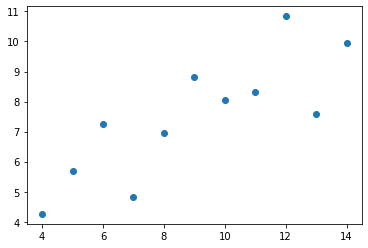

In [79]:
# scatter plot
plt.plot(data1['x'],data1['y'],'o')

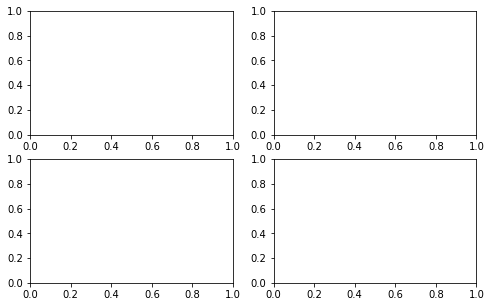

In [80]:
# 기본 틀 만들기
fig = plt.figure(figsize=(8,5))

# 그래프 틀 추가
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

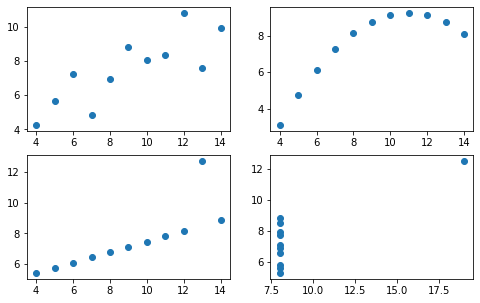

In [81]:
# 기본 틀 만들기
fig = plt.figure(figsize=(8,5))

# 그래프 틀 추가
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 그래프 그리기
ax1.plot(data1['x'], data1['y'], 'o')
ax2.plot(data2['x'], data2['y'], 'o')
ax3.plot(data3['x'], data3['y'], 'o')
ax4.plot(data4['x'], data4['y'], 'o')


Text(0.5, 1.0, 'data4')

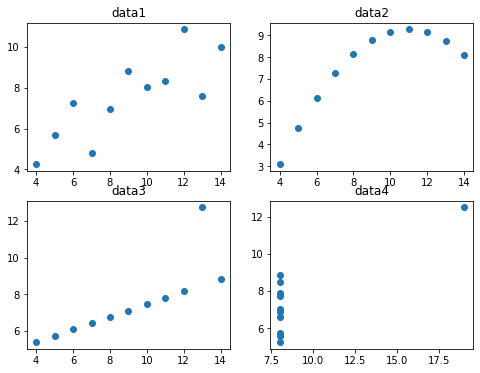

In [82]:
# 기본 틀 만들기
fig = plt.figure(figsize=(8,6))

# 그래프 틀 추가
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 그래프 그리기
ax1.plot(data1['x'], data1['y'], 'o')
ax2.plot(data2['x'], data2['y'], 'o')
ax3.plot(data3['x'], data3['y'], 'o')
ax4.plot(data4['x'], data4['y'], 'o')

# 제목 추가
ax1.set_title('data1')
ax2.set_title('data2')
ax3.set_title('data3')
ax4.set_title('data4')



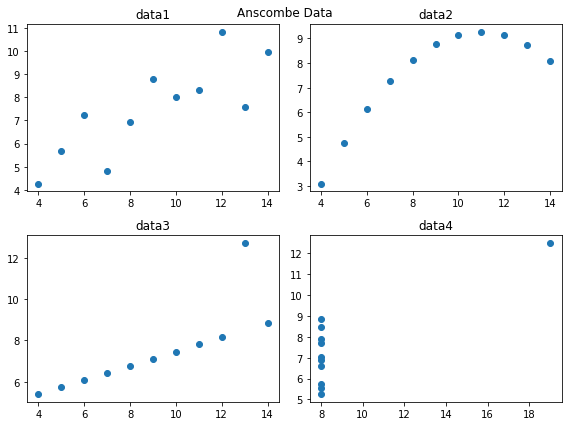

In [83]:
# 기본 틀 만들기
fig = plt.figure(figsize=(8,6))

# 그래프 틀 추가
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 그래프 그리기
ax1.plot(data1['x'], data1['y'], 'o')
ax2.plot(data2['x'], data2['y'], 'o')
ax3.plot(data3['x'], data3['y'], 'o')
ax4.plot(data4['x'], data4['y'], 'o')

# 제목 추가
ax1.set_title('data1')
ax2.set_title('data2')
ax3.set_title('data3')
ax4.set_title('data4')

# 큰 제목 추가
fig.suptitle('Anscombe Data')

# 여백 조정
fig.tight_layout()

## 데이터 시각화 - seaborn 라이브러리

In [84]:
import seaborn as sns
tips = sns.load_dataset('tips')

Text(0.5, 1.0, 'Total Bill Histogram')

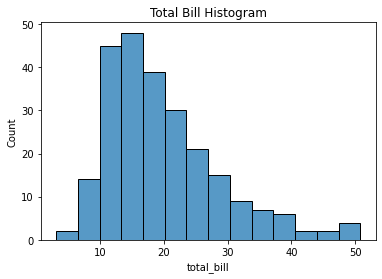

In [85]:
# 히스토그램
x = sns.histplot(tips['total_bill'])
x.set_title('Total Bill Histogram')

Text(0, 0.5, 'Average total bill')

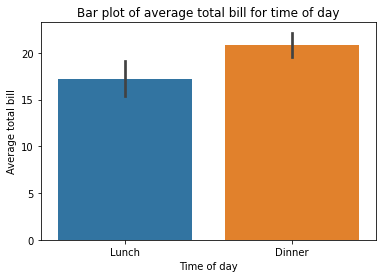

In [86]:
# bar plot
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Average total bill')

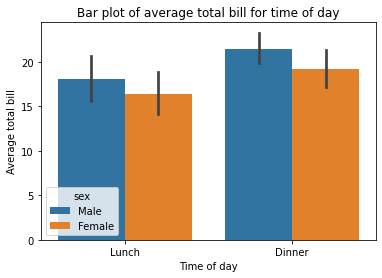

In [87]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips, hue='sex')
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

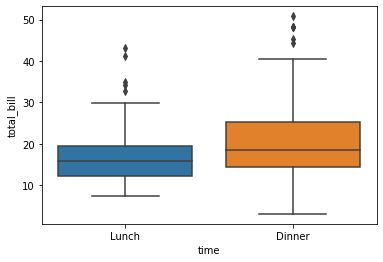

In [88]:
# box plot
sns.boxplot(data=tips, x='time', y='total_bill')

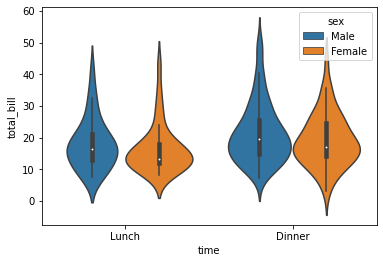

In [89]:
# violin plot
sns.violinplot(data=tips, x='time', y='total_bill', hue='sex')

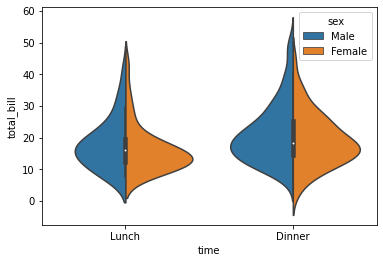

In [90]:
sns.violinplot(data=tips, x='time', y='total_bill', hue='sex', split= True)

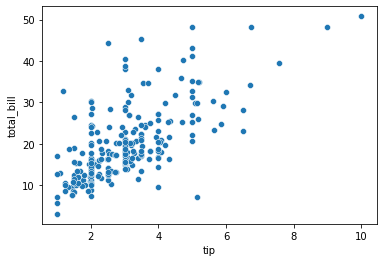

In [91]:
# 산점도
sns.scatterplot(data=tips, x='tip', y='total_bill')

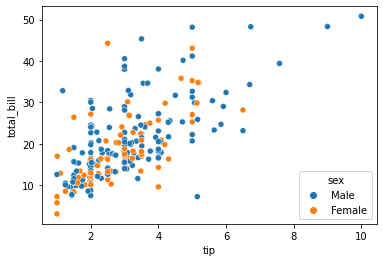

In [92]:
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='sex')

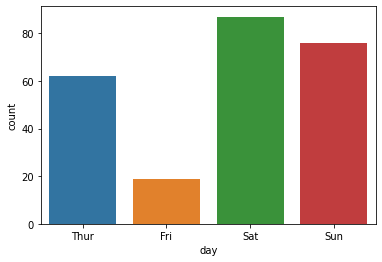

In [93]:
# count plot
sns.countplot(data=tips, x='day')

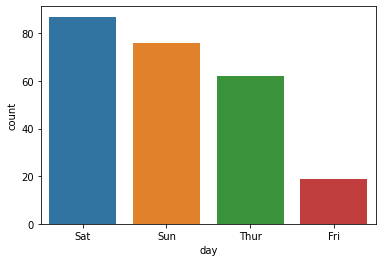

In [94]:
# 정렬
sns.countplot(data=tips, x='day', order=tips['day'].value_counts().index)

## plotly

In [95]:
count_days = tips.groupby('day', as_index = False).agg(count = ('total_bill', 'count'))
count_days

,day,count
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


In [96]:
import plotly.express as px
fig = px.pie(count_days, values='count', names='day' )
fig.show()

In [97]:
fig = px.scatter(tips, x="total_bill", y="tip",
	         size="size", color="sex",
                 hover_name="tip", log_x=True, size_max=20)
fig.show()

## 연습문제

#### Example 1. 시각화 라이브러리를 호출하고 예제 데이터 ((@preprocessing_data_member01.csv)를 불러와‘최종주문요일’ 항목에 대한 Count Plot 시각화 하기

In [98]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [103]:
import matplotlib.font_manager as fm
plt.rcParams['font.family']='NanumGothic'

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/data/@preprocessing_data_member01.csv')

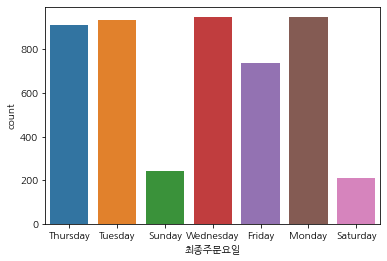

In [105]:
sns.countplot(data=data, x='최종주문요일')
plt.show()

#### Example 2. 예제 나이 칼럼을 활용하여 ‘연령대’칼럼을 생성하고, seaborn의 hue를 이용하여,‘성별’을 overlay한 Count Plot 시각화 하기 ( x = ‘연령대’ , hue = ‘성별’)


In [107]:
data['연령대'] = data['나이'].apply(lambda x: str(int(x/10))+'0 대' )

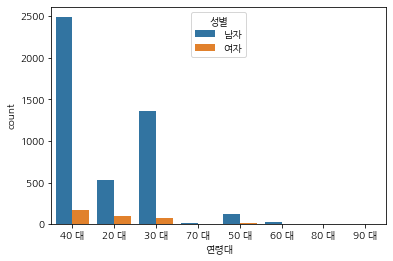

In [108]:
sns.countplot(data=data, x='연령대', hue='성별')

#### Example 3. 예제 데이터의 ‘최종주문일자’과 ‘가입월’에 대해 Dist Plot 하기

In [ ]:
subset = pd.pivot_table(data=data, index='최종주문일자', columns='가입월', values='ID',aggfunc='count')
subset

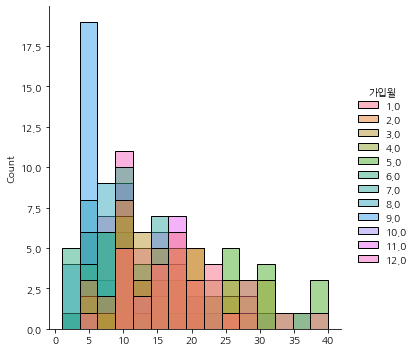

In [130]:
sns.displot(subset)
plt.show()

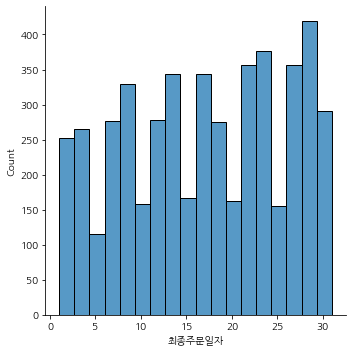

In [135]:
# 따로 그리기
sns.displot(x=data['최종주문일자'])

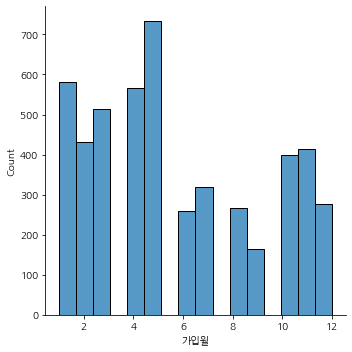

In [136]:
sns.displot(x=data['가입월'])

#### Example 4. 예제 데이터의‘최종주문월’에 대한 ‘총순수이익’을 Line Plot 시각화 하기

In [131]:
subset1= pd.pivot_table(data=data, index='최종주문월', values='총순수이익', aggfunc='sum')
subset1

,총순수이익
최종주문월,
1.0,55115680.0
2.0,53609835.0
3.0,60757900.0
4.0,135182715.0
5.0,769239330.0
6.0,12398900.0
7.0,11907380.0
8.0,18518990.0
9.0,16985165.0


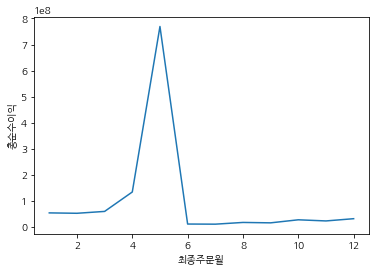

In [138]:
sns.lineplot(data=subset1, x='최종주문월', y='총순수이익')

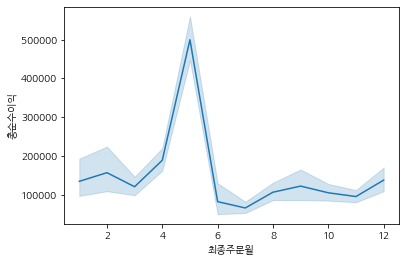

In [139]:
sns.lineplot(data = data, x = '최종주문월', y = '총순수이익')

#### Example 5. 예제 데이터의 ‘성별’에 따른 ‘나이’을 Box Plot 하기

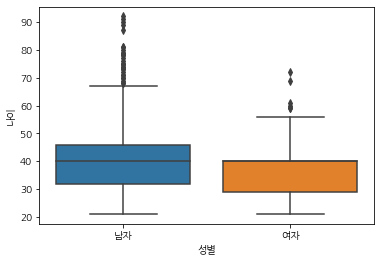

In [120]:
sns.boxplot(data=data, x='성별', y='나이')

####  Example 6. 예제 데이터의 ‘ 유입경로 ’ 별 ‘ 총판매액 ’ 을 Bar Plot 하기


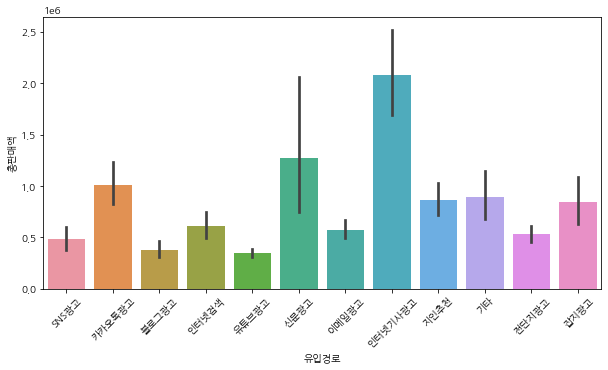

In [162]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='유입경로', y='총판매액')
plt.xticks(rotation=45)
plt.show()

#### Example 7.
* 예제 데이터의 주소를 추출하여 , 광역시 , 도로 이루어진 새로운 Column 을 만들기
* 광역시, 도로 이루어진 새로운칼럼의 총판매액의 합을 데이터 프레임으로 표현하기

In [163]:
data['주소']

0                               미확인
1         서울특별시 강남구 광평로51길 27 (수서동)
2            대구광역시 남구 대봉로 183 (이천동)
3         경기도 부천시 부천로476번길 46 (오정동)
4         전라남도 나주시 그린로 317-7 (빛가람동)
                   ...             
4919       충청남도 당진시 서부로 159-1 (채운동)
4920      경기도 화성시 동탄대로시범길 193 (청계동)
4921    경기도 용인시 기흥구 한보라1로 132 (공세동)
4922     부산광역시 사하구 감천로43번길 20 (감천동)
4923                    울산광역시 남구 달동
Name: 주소, Length: 4924, dtype: object

In [ ]:
data['시도']= data['주소'].apply(lambda x: str(x).split(' ')[0])
data

In [168]:
data_sido = data.groupby('시도', as_index=False)[['총판매액']].sum()
data_sido

,시도,총판매액
0,강원도,126540230
1,경기도,523177830
2,경상남도,316010320
3,경상북도,199527460
4,광주광역시,97013340
5,대구광역시,156141620
6,대전광역시,116976150
7,미확인,20486920
8,부산광역시,345950640
9,서울특별시,350860160


####  Example 8. 예제 4-7 에서 생성한 Pivot Table 를 새로운 DataFrame로 선언하여 ,‘ 주소 (광역시 ,도 )’ 에 따른 ‘ 총판매액’을 Bar Plot 하기

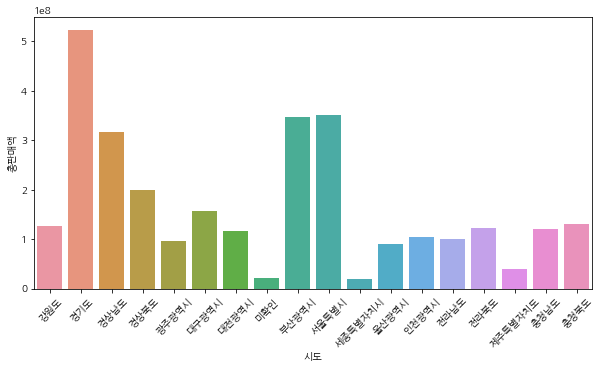

In [170]:
plt.figure(figsize=(10,5))
sns.barplot(data=data_sido, x='시도', y='총판매액')
plt.xticks(rotation=45)
plt.show()

#### Example 9. 예제 데이터의 ‘ 총판매액’의 요약통계량을 확인하여 , 25% ~ 75% 사이의 데이터를 추출하고 , 추출한 데이터로 Dist Plot 생성하기

In [172]:
data['총판매액'].describe()

count    4.924000e+03
mean     6.048520e+05
std      1.360792e+06
min      0.000000e+00
25%      9.685000e+04
50%      2.044700e+05
75%      5.380450e+05
max      2.848858e+07
Name: 총판매액, dtype: float64

In [186]:
data_25_75 = data[(9.685000e+04<data['총판매액']) & (data['총판매액']<5.380450e+05)]['총판매액']
data_25_75

0       103300
4       360800
5       108110
6       200480
8       225070
         ...  
4914    138910
4915    387960
4917    174670
4918    464670
4923    153650
Name: 총판매액, Length: 2458, dtype: int64

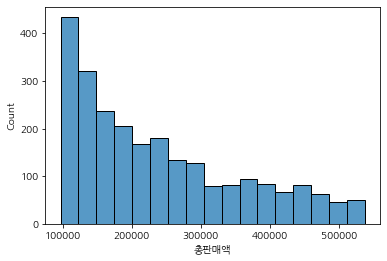

In [175]:
sns.histplot(data_25_75)

#### Example 10.
(1) 예제 데이터의 ID에 따른 ‘ 총판매액’와 ‘ 총구매횟수’를 하나의 DataFrame 으로 생성하기

(2) 생성된 DataFrame 에서 ‘ 총판매액’과 ‘총구매횟수’를 Scatter Plot 하기

In [182]:
data_sale = pd.pivot_table(data=data, index='ID', values='총판매액')
data_count = pd.pivot_table(data=data, index='ID', values='총구매횟수')
data_total = pd.concat([data_sale, data_count] ,axis=1)
data_total

,총판매액,총구매횟수
ID,,
100304734@n,103300,1
1003409866@k,4303880,18
100381931@n,71050,3
1004498382@k,76400,1
1004547839@k,360800,1
...,...,...
zxvnm07,94380,1
zxxz60,1341280,6
zzar2000,1534750,19


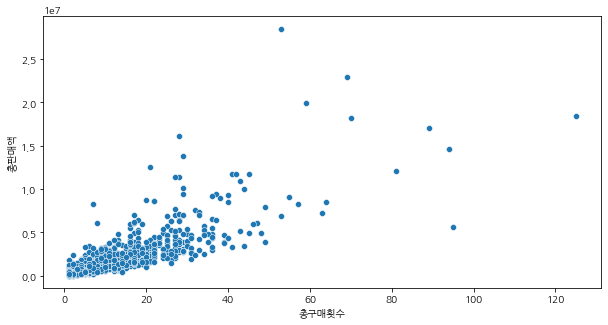

In [185]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data_total, x='총구매횟수',y='총판매액')